In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from FABdiffME.targets.ee_to_mumu import EeToMumu

### Test $e^+ + e^- \rightarrow \mu^+ + \mu^-$ `madjax` matrix element

In [2]:
# Load matrix element
dim = 2
center_of_mass_energy = 1000 # [GeV]
model_parameters = {}

target = EeToMumu(dim=dim, center_of_mass_energy=center_of_mass_energy, model_parameters=model_parameters)

In [3]:
# Setup unit grid with axes [x, y]
x = y = jnp.linspace(0., 1., 200)[1:-1]
grid_unit = jnp.dstack(jnp.meshgrid(x, y))
grid_unit = grid_unit.reshape([-1, 2])
prob_me = target.prob_no_nan(grid_unit)

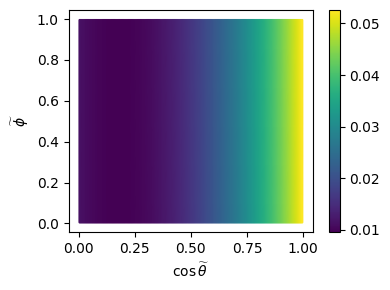

In [4]:
# Plot distribution
fig, axs = plt.subplots(1,1, figsize=(4,3))
pcm0 = axs.scatter(grid_unit[:,0], grid_unit[:,1], c=prob_me, s=.5)
fig.colorbar(pcm0, ax=axs)
axs.set_xlabel(r"$\cos \widetilde{\theta}$")
axs.set_ylabel(r"$\widetilde{\phi}$")
#fig.suptitle(r"Evaluation of $e^+e^- \rightarrow \mu^+ \mu^-$ matrix element", fontsize=10)
plt.tight_layout();

### Cross-check correct behavior of matrix element
- Plot profile along $\cos \tilde{\theta}$-axis for different Fermi constants

In [6]:
diff_Fermi_consts = [0.9e-05, 1.0e-05, 1.1e-05, 1.2e-05, 1.3e-05, 1.4e-05, 1.5e-05]
labels = [r"$0.9 \cdot 10^{-6}$", r"$1.0 \cdot 10^{-6}$", r"$1.1 \cdot 10^{-6}$", r"$1.2 \cdot 10^{-6}$", r"$1.3 \cdot 10^{-6}$", r"$1.4 \cdot 10^{-6}$", r"$1.5 \cdot 10^{-6}$"]
n = int(jnp.sqrt(grid_unit[:,0].shape[0]))
line_points = jnp.array([grid_unit[:,0].reshape([n, n])[0,:], grid_unit[:,0].reshape([n, n])[:,0]]).T

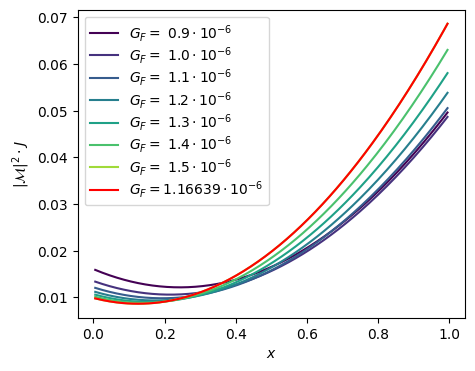

In [7]:
fig, axs = plt.subplots(1,1, figsize=(5, 4))
cmap = plt.get_cmap('viridis')
for c, const in enumerate(diff_Fermi_consts):
    model_parameters_new = {('sminputs', 2): const} # deviations of Fermi Constant
    target = EeToMumu(dim=dim, center_of_mass_energy=center_of_mass_energy, model_parameters=model_parameters_new)
    me_vals = target.prob_no_nan(line_points)
    axs.plot(line_points[:,0], me_vals, c=cmap(c/len(diff_Fermi_consts)), label=f"$G_F =$ {labels[c]}")
    
model_parameters = {('sminputs', 2): 1.166390e-05} # true Fermi Constant
target = EeToMumu(dim=dim, center_of_mass_energy=center_of_mass_energy, model_parameters=model_parameters_new)
me_vals = target.prob_no_nan(line_points)

axs.plot(line_points[:,0], me_vals, c="red", label=r"$G_F = 1.16639 \cdot 10^{-6}$")
axs.set_xlabel(r"$x$")
axs.set_ylabel(r"$|\mathcal{M}|^2\cdot J$")
axs.legend(labelspacing=0.1);

### Test sample function based on rejection sampling

In [8]:
key = jax.random.PRNGKey(2)
samples, no_trarget_evals = target.sample(key, n_samples=400)
print("Number of target evaluations:", no_trarget_evals)

4 / 400 no. target evaluations: 10
Number of target evaluations: 1100


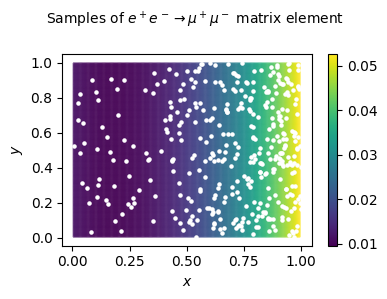

In [9]:
fig, axs = plt.subplots(1,1, figsize=(4,3))
pcm0 = axs.scatter(grid_unit[:,0], grid_unit[:,1], c=prob_me, s=.1)
fig.colorbar(pcm0, ax=axs)
axs.scatter(samples[:,0], samples[:,1], c="white", s=5)
axs.set_xlabel(r"$x$")
axs.set_ylabel(r"$y$")
fig.suptitle(r"Samples of $e^+e^- \rightarrow \mu^+ \mu^-$ matrix element", fontsize=10)
plt.tight_layout();